# Fitting data with least squares
Write here the theory from the book that Daan told me

# Power law example
This example is taken from 
https://scipy.github.io/old-wiki/pages/Cookbook/FittingData.html#Fitting_a_power-law_to_data_with_errors
suppose that we have the following power law:

$y=ax^b$

with $a=10$, $b=-2$

so lets first generate the data

In [4]:
from pylab import *
from scipy import *

# Define function for calculating a power law
powerlaw = lambda x, amp, index: amp * (x**index)

##########
# Generate data points with noise
##########
num_points = 20

# Note: all positive, non-zero data
xdata = linspace(1.1, 10.1, num_points) 
ydata = powerlaw(xdata, 10.0, -2.0)     # simulated perfect data

now lets add some gaussian noise to the data with 10% error.

In [2]:
yerr = 0.2 * ydata                      # simulated errors (10%)
ydata += randn(num_points) * yerr       # simulated noisy data

If your data is well-behaved, you can fit a power-law function by first converting to a linear equation by using the logarithm. Then use the optimize function to fit a straight line. Notice that we are weighting by positional uncertainties during the fit. Also, the best-fit parameters uncertainties are estimated from the variance-covariance matrix.

[ 1. -2.]
[[ 0.01474914 -0.01878229]
 [-0.01878229  0.02767043]]


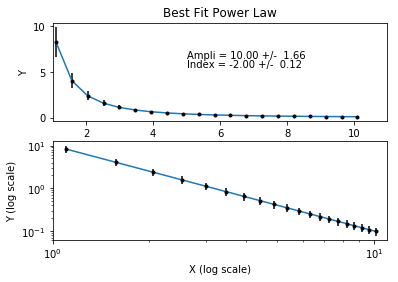

In [6]:
from scipy import optimize
##########
# Fitting the data -- Least Squares Method
##########

# Power-law fitting is best done by first converting
# to a linear equation and then fitting to a straight line.
#
#  y = a * x^b
#  log(y) = log(a) + b*log(x)
#

logx = log10(xdata)
logy = log10(ydata)
logyerr = yerr / ydata

# define our (line) fitting function
fitfunc = lambda p, x: p[0] + p[1] * x   
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

pinit = [1.0, -1.0]
out = optimize.leastsq(errfunc, pinit,
                       args=(logx, logy, logyerr), full_output=1)

pfinal = out[0]
covar = out[1]
print pfinal
print covar

index = pfinal[1]
amp = 10.0**pfinal[0]

indexErr = sqrt( covar[0][0] ) 
ampErr = sqrt( covar[1][1] ) * amp

##########
# Plotting data
##########

clf()
subplot(2, 1, 1)
plot(xdata, powerlaw(xdata, amp, index))     # Fit
errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
text(5, 6.5, 'Ampli = %5.2f +/- %5.2f' % (amp, ampErr))
text(5, 5.5, 'Index = %5.2f +/- %5.2f' % (index, indexErr))
title('Best Fit Power Law')
xlabel('X')
ylabel('Y')
xlim(1, 11)

subplot(2, 1, 2)
loglog(xdata, powerlaw(xdata, amp, index))
errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
xlabel('X (log scale)')
ylabel('Y (log scale)')
xlim(1.0, 11)

savefig('power_law_fit.png')

Now lets perform the same fitting with numpy polyfit, in order to include the weights that are given by the error we use the parameter w of the function that is described in the documentation as:
Weights to apply to the y-coordinates of the sample points. For gaussian uncertainties, use 1/sigma (not 1/sigma**2).

# Note
The coefficients are organized as p(x) = p[0] * x**deg + ... + p[deg] which is the opposite to the previous example with scipy


In [7]:
import numpy as np

p_numpy=np.polyfit(logx, logy, w=1/logyerr, deg=1)

Now lets compare the fitting coefficients for both methods

In [10]:
print p_numpy, pfinal

[-2.  1.] [ 1. -2.]
